### Group Assignment Number 1:

---
#### Members - 

---

**Name** -  Tejas Liladhar Kolhe
**PRN** -- 230940128016

**Name** -  Ankush Sunil Sonawane
**PRN** -- 230940128004

**Name** -  Atharva Neelesh Tejale
**PRN** -- 230940128007

**Name** -  Pradhyumn Narendra Thote
**PRN** -- 230940128032

**Name** -  Vikram Dipak Rahane
**PRN** -- 230940128036


In [1]:
###-----------------
### Import Libraries
###-----------------

import os
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

import warnings as w
w.filterwarnings('ignore')

2023-11-29 13:15:49.107472: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 13:15:49.168449: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 13:15:49.168494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 13:15:49.169854: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 13:15:49.179209: I tensorflow/core/platform/cpu_feature_guar

In [2]:
#Parameters
RANDOM_STATE = 24  #Everytime we get same data split 
EPOCHS = 1500 # Iteration to Backpropogate and Train our Model 
BATCH_SIZE = 32 # It affects training time and the generalization of the model
TEST_SIZE = 0.2 # To have some Unseen data to Check our Model's Accuracy 
ALPHA= 0.0001 # Adam Optimizer parameter - controls the moving average
PATIENCE = 100

In [3]:
df = pd.read_csv('../ionosphere.data',header=None)
df.head()

0   1        2        3        4        5        6        7        8   \
0   1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1   1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2   1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3   1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4   1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

        9   ...       25       26       27       28       29       30  \
0  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   
3  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682   
4 -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707   

        31       32       33  34  
0 -0.54487  0.18641 -0.45300   g  
1 -0.06288 -0.13738 -0.02447   b  
2 -0.24180  0.56045 -0.38238   g  
3  1.00000 -0.32382  1.00000   b  
4 -0.59573 -0.04608 -0.65697   g  

[5 rows x 35 columns]

In [4]:
df.drop(columns=1,inplace=True)

In [5]:
x = df.iloc[:,:-1]
x

0        2        3        4        5        6        7        8   \
0     1  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1     1  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2     1  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3     1  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4     1  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   
..   ..      ...      ...      ...      ...      ...      ...      ...   
346   1  0.83508  0.08298  0.73739 -0.14706  0.84349 -0.05567  0.90441   
347   1  0.95113  0.00419  0.95183 -0.02723  0.93438 -0.01920  0.94590   
348   1  0.94701 -0.00034  0.93207 -0.03227  0.95177 -0.03431  0.95584   
349   1  0.90608 -0.01657  0.98122 -0.01989  0.95691 -0.03646  0.85746   
350   1  0.84710  0.13533  0.73638 -0.06151  0.87873  0.08260  0.88928   

          9        10  ...       24       25       26       27       28  \
0    0.03760  0.85243  ...  0.56811 -0.51171  0.41078 -0.46168  0.21266   
1   -0.04549  0.50874  ... -0.20332 -0.26569 -0.20468 -0.18401 -0.19040   
2    0.01198  0.73082  ...  0.57528 -0.40220  0.58984 -0.22145  0.43100   
3    0.00000  0.00000  ...  1.00000  0.90695  0.51613  1.00000  1.00000   
4   -0.16399  0.52798  ...  0.03286 -0.65158  0.13290 -0.53206  0.02431   
..       ...      ...  ...      ...      ...      ...      ...      ...   
346 -0.04622  0.89391  ...  0.95378 -0.04202  0.83479  0.00123  1.00000   
347  0.01606  0.96510  ...  0.94520  0.01361  0.93522  0.04925  0.93159   
348  0.02446  0.94124  ...  0.93988  0.03193  0.92489  0.02542  0.92120   
349  0.00110  0.89724  ...  0.91050 -0.02099  0.89147 -0.07760  0.82983   
350 -0.09139  0.78735  ...  0.86467 -0.15114  0.81147 -0.04822  0.78207   

          29       30       31       32       33  
0   -0.34090  0.42267 -0.54487  0.18641 -0.45300  
1   -0.11593 -0.16626 -0.06288 -0.13738 -0.02447  
2   -0.17365  0.60436 -0.24180  0.56045 -0.38238  
3   -0.20099  0.25682  1.00000 -0.32382  1.00000  
4   -0.62197 -0.05707 -0.59573 -0.04608 -0.65697  
..       ...      ...      ...      ...      ...  
346  0.12815  0.86660 -0.10714  0.90546 -0.04307  
347  0.08168  0.94066 -0.00035  0.91483  0.04712  
348  0.02242  0.92459  0.00442  0.92697 -0.00577  
349 -0.17238  0.96022 -0.03757  0.87403 -0.16243  
350 -0.00703  0.75747 -0.06678  0.85764 -0.06151  

[351 rows x 33 columns]

In [6]:
y = df.iloc[:,-1]
y

0      g
1      b
2      g
3      b
4      g
      ..
346    g
347    g
348    g
349    g
350    g
Name: 34, Length: 351, dtype: object

In [7]:
lbl = LabelEncoder()
std = StandardScaler()

In [8]:
x = std.fit_transform(x)
x

array([[ 0.34843328,  0.71237237, -0.23425724, ..., -1.05505394,
        -0.3122206 , -0.99959483],
       [ 0.34843328,  0.72164805, -0.52781074, ..., -0.11521328,
        -0.93260505, -0.08328554],
       [ 0.34843328,  0.72164805, -0.17699842, ..., -0.46409249,
         0.40444328, -0.84859079],
       ...,
       [ 0.34843328,  0.61502805, -0.10143222, ...,  0.01601615,
         1.10669878, -0.04330004],
       [ 0.34843328,  0.53267371, -0.13825118, ..., -0.06586087,
         1.00526528, -0.37828012],
       [ 0.34843328,  0.41400137,  0.20634524, ..., -0.12281796,
         0.9738619 , -0.16248675]])

In [9]:
y = lbl.fit_transform(y)
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
y.shape

(351,)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(x,y,
                                                test_size=TEST_SIZE,
                                                random_state=RANDOM_STATE,
                                                stratify=y,
                                                shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((280, 33), (71, 33), (280,), (71,))

In [12]:
type(X_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

$$ Number of neurons In Current Layer =  
 Previous Layer's No. of Neuron - ((no.of Inputs)-(No. of Output Classes))/(Number of Layer) $$ 

In [13]:
knl_reg = tf.keras.regularizers.L2(l2=0.01) # Lasso Regu

model = tf.keras.Sequential([
    
    
    tf.keras.layers.Dense(23,activation='relu',kernel_regularizer = knl_reg),
    # Dropout layer with a rate of 0.05 to prevent overfitting
    tf.keras.layers.Dropout(rate=0.05),
    
    tf.keras.layers.Dense(13,activation='relu',kernel_regularizer = knl_reg),
    tf.keras.layers.Dropout(rate=0.05),
    
    tf.keras.layers.Dense(3,activation='relu',kernel_regularizer = knl_reg),
    tf.keras.layers.Dropout(rate=0.05),
    
    # Final Dense layer with 2 neurons (for binary classification) 
    tf.keras.layers.Dense(2,activation='sigmoid')
    
])

In [14]:
#Since the data is binary with only single column we have used the SparseCategoricalCrossentropy()
ce_loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [15]:
optim = tf.keras.optimizers.Adam(learning_rate=ALPHA)

In [16]:
model.compile(optimizer=optim,loss=ce_loss,metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,
                    validation_data = [X_test,y_test],
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 1
                   )

Epoch 1/1500
9/9 [==============================] - 2s 45ms/step - loss: 1.2385 - accuracy: 0.4000 - val_loss: 1.2154 - val_accuracy: 0.3380
Epoch 2/1500
9/9 [==============================] - 0s 12ms/step - loss: 1.2242 - accuracy: 0.4357 - val_loss: 1.2079 - val_accuracy: 0.3521
Epoch 3/1500
9/9 [==============================] - 0s 13ms/step - loss: 1.2111 - accuracy: 0.4286 - val_loss: 1.2000 - val_accuracy: 0.3521
Epoch 4/1500
9/9 [==============================] - 0s 13ms/step - loss: 1.2103 - accuracy: 0.4071 - val_loss: 1.1927 - val_accuracy: 0.3521
Epoch 5/1500
9/9 [==============================] - 0s 12ms/step - loss: 1.1913 - accuracy: 0.4679 - val_loss: 1.1859 - val_accuracy: 0.3239
Epoch 6/1500
9/9 [==============================] - 0s 13ms/step - loss: 1.1939 - accuracy: 0.4750 - val_loss: 1.1794 - val_accuracy: 0.3803
Epoch 7/1500
9/9 [==============================] - 0s 34ms/step - loss: 1.2002 - accuracy: 0.4607 - val_loss: 1.1727 - val_accuracy: 0.3944
Epoch 8/1500


Epoch 59/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.9853 - accuracy: 0.7893 - val_loss: 0.9689 - val_accuracy: 0.8310
Epoch 60/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.9723 - accuracy: 0.7821 - val_loss: 0.9655 - val_accuracy: 0.8310
Epoch 61/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.9733 - accuracy: 0.7714 - val_loss: 0.9621 - val_accuracy: 0.8310
Epoch 62/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.9671 - accuracy: 0.7893 - val_loss: 0.9586 - val_accuracy: 0.8310
Epoch 63/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.9621 - accuracy: 0.8214 - val_loss: 0.9550 - val_accuracy: 0.8310
Epoch 64/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.9704 - accuracy: 0.7821 - val_loss: 0.9513 - val_accuracy: 0.8310
Epoch 65/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.9498 - accuracy: 0.8250 - val_loss: 0.9473 - val_accuracy: 0.8310
Epoch 

9/9 [==============================] - 0s 13ms/step - loss: 0.6245 - accuracy: 0.8929 - val_loss: 0.6269 - val_accuracy: 0.8732
Epoch 174/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.6118 - accuracy: 0.9107 - val_loss: 0.6254 - val_accuracy: 0.8732
Epoch 175/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.6192 - accuracy: 0.9071 - val_loss: 0.6236 - val_accuracy: 0.8732
Epoch 176/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.6026 - accuracy: 0.9179 - val_loss: 0.6218 - val_accuracy: 0.8732
Epoch 177/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.6088 - accuracy: 0.9036 - val_loss: 0.6199 - val_accuracy: 0.8732
Epoch 178/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.6133 - accuracy: 0.9000 - val_loss: 0.6177 - val_accuracy: 0.8732
Epoch 179/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.6083 - accuracy: 0.9107 - val_loss: 0.6158 - val_accuracy: 0.8732
Epoch 180/1500

9/9 [==============================] - 0s 13ms/step - loss: 0.4577 - accuracy: 0.9393 - val_loss: 0.4759 - val_accuracy: 0.9155
Epoch 288/1500
9/9 [==============================] - 0s 14ms/step - loss: 0.4796 - accuracy: 0.9179 - val_loss: 0.4748 - val_accuracy: 0.9155
Epoch 289/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.4627 - accuracy: 0.9214 - val_loss: 0.4739 - val_accuracy: 0.9155
Epoch 290/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.4709 - accuracy: 0.9357 - val_loss: 0.4732 - val_accuracy: 0.9155
Epoch 291/1500
9/9 [==============================] - 0s 14ms/step - loss: 0.4586 - accuracy: 0.9250 - val_loss: 0.4722 - val_accuracy: 0.9155
Epoch 292/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.4452 - accuracy: 0.9429 - val_loss: 0.4712 - val_accuracy: 0.9155
Epoch 293/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.4639 - accuracy: 0.9429 - val_loss: 0.4700 - val_accuracy: 0.9155
Epoch 294/1500

9/9 [==============================] - 0s 13ms/step - loss: 0.3448 - accuracy: 0.9643 - val_loss: 0.3787 - val_accuracy: 0.9296
Epoch 402/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.3661 - accuracy: 0.9536 - val_loss: 0.3782 - val_accuracy: 0.9296
Epoch 403/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.3744 - accuracy: 0.9464 - val_loss: 0.3773 - val_accuracy: 0.9296
Epoch 404/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.3670 - accuracy: 0.9393 - val_loss: 0.3766 - val_accuracy: 0.9296
Epoch 405/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.3594 - accuracy: 0.9464 - val_loss: 0.3760 - val_accuracy: 0.9296
Epoch 406/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.3865 - accuracy: 0.9321 - val_loss: 0.3748 - val_accuracy: 0.9296
Epoch 407/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.3702 - accuracy: 0.9250 - val_loss: 0.3740 - val_accuracy: 0.9296
Epoch 408/1500

9/9 [==============================] - 0s 13ms/step - loss: 0.3015 - accuracy: 0.9607 - val_loss: 0.3142 - val_accuracy: 0.9577
Epoch 516/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.3032 - accuracy: 0.9536 - val_loss: 0.3138 - val_accuracy: 0.9577
Epoch 517/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.3073 - accuracy: 0.9464 - val_loss: 0.3134 - val_accuracy: 0.9577
Epoch 518/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.2923 - accuracy: 0.9464 - val_loss: 0.3131 - val_accuracy: 0.9577
Epoch 519/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.2903 - accuracy: 0.9643 - val_loss: 0.3127 - val_accuracy: 0.9577
Epoch 520/1500
9/9 [==============================] - 0s 14ms/step - loss: 0.2963 - accuracy: 0.9500 - val_loss: 0.3124 - val_accuracy: 0.9577
Epoch 521/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.2773 - accuracy: 0.9714 - val_loss: 0.3122 - val_accuracy: 0.9577
Epoch 522/1500

9/9 [==============================] - 0s 13ms/step - loss: 0.2424 - accuracy: 0.9714 - val_loss: 0.2754 - val_accuracy: 0.9577
Epoch 630/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.2574 - accuracy: 0.9536 - val_loss: 0.2755 - val_accuracy: 0.9577
Epoch 631/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.2506 - accuracy: 0.9643 - val_loss: 0.2752 - val_accuracy: 0.9577
Epoch 632/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.2629 - accuracy: 0.9500 - val_loss: 0.2751 - val_accuracy: 0.9577
Epoch 633/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.2435 - accuracy: 0.9750 - val_loss: 0.2751 - val_accuracy: 0.9577
Epoch 634/1500
9/9 [==============================] - 0s 14ms/step - loss: 0.2506 - accuracy: 0.9643 - val_loss: 0.2750 - val_accuracy: 0.9577
Epoch 635/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.2468 - accuracy: 0.9607 - val_loss: 0.2749 - val_accuracy: 0.9577
Epoch 636/1500

9/9 [==============================] - 0s 13ms/step - loss: 0.2129 - accuracy: 0.9786 - val_loss: 0.2503 - val_accuracy: 0.9577
Epoch 744/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.2150 - accuracy: 0.9714 - val_loss: 0.2504 - val_accuracy: 0.9577
Epoch 745/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.2137 - accuracy: 0.9786 - val_loss: 0.2500 - val_accuracy: 0.9577
Epoch 746/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.2235 - accuracy: 0.9714 - val_loss: 0.2498 - val_accuracy: 0.9577
Epoch 747/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.2207 - accuracy: 0.9679 - val_loss: 0.2497 - val_accuracy: 0.9577
Epoch 748/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.2397 - accuracy: 0.9536 - val_loss: 0.2494 - val_accuracy: 0.9577
Epoch 749/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.2138 - accuracy: 0.9714 - val_loss: 0.2490 - val_accuracy: 0.9577
Epoch 750/1500

9/9 [==============================] - 0s 12ms/step - loss: 0.1948 - accuracy: 0.9786 - val_loss: 0.2395 - val_accuracy: 0.9718
Epoch 858/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1927 - accuracy: 0.9714 - val_loss: 0.2393 - val_accuracy: 0.9718
Epoch 859/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.2165 - accuracy: 0.9679 - val_loss: 0.2391 - val_accuracy: 0.9718
Epoch 860/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.2051 - accuracy: 0.9643 - val_loss: 0.2386 - val_accuracy: 0.9718
Epoch 861/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1923 - accuracy: 0.9786 - val_loss: 0.2387 - val_accuracy: 0.9718
Epoch 862/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1911 - accuracy: 0.9786 - val_loss: 0.2387 - val_accuracy: 0.9718
Epoch 863/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.2089 - accuracy: 0.9571 - val_loss: 0.2387 - val_accuracy: 0.9718
Epoch 864/1500

9/9 [==============================] - 0s 13ms/step - loss: 0.1802 - accuracy: 0.9786 - val_loss: 0.2310 - val_accuracy: 0.9577
Epoch 972/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1761 - accuracy: 0.9786 - val_loss: 0.2312 - val_accuracy: 0.9718
Epoch 973/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1922 - accuracy: 0.9607 - val_loss: 0.2315 - val_accuracy: 0.9718
Epoch 974/1500
9/9 [==============================] - 0s 14ms/step - loss: 0.1615 - accuracy: 0.9964 - val_loss: 0.2317 - val_accuracy: 0.9718
Epoch 975/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1901 - accuracy: 0.9643 - val_loss: 0.2314 - val_accuracy: 0.9718
Epoch 976/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1938 - accuracy: 0.9607 - val_loss: 0.2314 - val_accuracy: 0.9718
Epoch 977/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1829 - accuracy: 0.9750 - val_loss: 0.2313 - val_accuracy: 0.9718
Epoch 978/1500

9/9 [==============================] - 0s 13ms/step - loss: 0.1809 - accuracy: 0.9643 - val_loss: 0.2344 - val_accuracy: 0.9718
Epoch 1086/1500
9/9 [==============================] - 0s 11ms/step - loss: 0.1569 - accuracy: 0.9857 - val_loss: 0.2339 - val_accuracy: 0.9718
Epoch 1087/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1700 - accuracy: 0.9786 - val_loss: 0.2344 - val_accuracy: 0.9718
Epoch 1088/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1702 - accuracy: 0.9750 - val_loss: 0.2353 - val_accuracy: 0.9718
Epoch 1089/1500
9/9 [==============================] - 0s 11ms/step - loss: 0.1676 - accuracy: 0.9750 - val_loss: 0.2356 - val_accuracy: 0.9718
Epoch 1090/1500
9/9 [==============================] - 0s 11ms/step - loss: 0.1768 - accuracy: 0.9679 - val_loss: 0.2352 - val_accuracy: 0.9718
Epoch 1091/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1615 - accuracy: 0.9857 - val_loss: 0.2350 - val_accuracy: 0.9718
Epoch 10

9/9 [==============================] - 0s 13ms/step - loss: 0.1728 - accuracy: 0.9643 - val_loss: 0.2322 - val_accuracy: 0.9718
Epoch 1143/1500
9/9 [==============================] - 0s 11ms/step - loss: 0.1631 - accuracy: 0.9821 - val_loss: 0.2327 - val_accuracy: 0.9718
Epoch 1144/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1587 - accuracy: 0.9821 - val_loss: 0.2328 - val_accuracy: 0.9718
Epoch 1145/1500
9/9 [==============================] - 0s 11ms/step - loss: 0.1562 - accuracy: 0.9857 - val_loss: 0.2327 - val_accuracy: 0.9718
Epoch 1146/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1573 - accuracy: 0.9857 - val_loss: 0.2326 - val_accuracy: 0.9718
Epoch 1147/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1541 - accuracy: 0.9857 - val_loss: 0.2321 - val_accuracy: 0.9718
Epoch 1148/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1587 - accuracy: 0.9821 - val_loss: 0.2334 - val_accuracy: 0.9718
Epoch 11

9/9 [==============================] - 0s 12ms/step - loss: 0.1745 - accuracy: 0.9643 - val_loss: 0.2305 - val_accuracy: 0.9718
Epoch 1200/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1565 - accuracy: 0.9750 - val_loss: 0.2305 - val_accuracy: 0.9718
Epoch 1201/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1654 - accuracy: 0.9750 - val_loss: 0.2307 - val_accuracy: 0.9718
Epoch 1202/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1725 - accuracy: 0.9607 - val_loss: 0.2306 - val_accuracy: 0.9718
Epoch 1203/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1685 - accuracy: 0.9679 - val_loss: 0.2305 - val_accuracy: 0.9718
Epoch 1204/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1580 - accuracy: 0.9821 - val_loss: 0.2315 - val_accuracy: 0.9718
Epoch 1205/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1786 - accuracy: 0.9536 - val_loss: 0.2312 - val_accuracy: 0.9718
Epoch 12

9/9 [==============================] - 0s 13ms/step - loss: 0.1535 - accuracy: 0.9786 - val_loss: 0.2336 - val_accuracy: 0.9718
Epoch 1257/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1507 - accuracy: 0.9786 - val_loss: 0.2341 - val_accuracy: 0.9718
Epoch 1258/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1557 - accuracy: 0.9750 - val_loss: 0.2334 - val_accuracy: 0.9718
Epoch 1259/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1537 - accuracy: 0.9750 - val_loss: 0.2335 - val_accuracy: 0.9718
Epoch 1260/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1432 - accuracy: 0.9929 - val_loss: 0.2342 - val_accuracy: 0.9718
Epoch 1261/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1610 - accuracy: 0.9714 - val_loss: 0.2347 - val_accuracy: 0.9718
Epoch 1262/1500
9/9 [==============================] - 0s 14ms/step - loss: 0.1539 - accuracy: 0.9786 - val_loss: 0.2361 - val_accuracy: 0.9718
Epoch 12

9/9 [==============================] - 0s 12ms/step - loss: 0.1547 - accuracy: 0.9750 - val_loss: 0.2382 - val_accuracy: 0.9718
Epoch 1314/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1570 - accuracy: 0.9679 - val_loss: 0.2374 - val_accuracy: 0.9718
Epoch 1315/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1622 - accuracy: 0.9679 - val_loss: 0.2361 - val_accuracy: 0.9718
Epoch 1316/1500
9/9 [==============================] - 0s 15ms/step - loss: 0.1583 - accuracy: 0.9750 - val_loss: 0.2351 - val_accuracy: 0.9718
Epoch 1317/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1646 - accuracy: 0.9643 - val_loss: 0.2352 - val_accuracy: 0.9718
Epoch 1318/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1505 - accuracy: 0.9786 - val_loss: 0.2354 - val_accuracy: 0.9718
Epoch 1319/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1601 - accuracy: 0.9643 - val_loss: 0.2352 - val_accuracy: 0.9718
Epoch 13

9/9 [==============================] - 0s 13ms/step - loss: 0.1435 - accuracy: 0.9857 - val_loss: 0.2364 - val_accuracy: 0.9718
Epoch 1371/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1593 - accuracy: 0.9643 - val_loss: 0.2376 - val_accuracy: 0.9718
Epoch 1372/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1498 - accuracy: 0.9750 - val_loss: 0.2374 - val_accuracy: 0.9718
Epoch 1373/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1567 - accuracy: 0.9750 - val_loss: 0.2366 - val_accuracy: 0.9718
Epoch 1374/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1559 - accuracy: 0.9714 - val_loss: 0.2358 - val_accuracy: 0.9718
Epoch 1375/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1494 - accuracy: 0.9786 - val_loss: 0.2368 - val_accuracy: 0.9718
Epoch 1376/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1571 - accuracy: 0.9679 - val_loss: 0.2364 - val_accuracy: 0.9718
Epoch 13

9/9 [==============================] - 0s 9ms/step - loss: 0.1515 - accuracy: 0.9786 - val_loss: 0.2354 - val_accuracy: 0.9718
Epoch 1428/1500
9/9 [==============================] - 0s 9ms/step - loss: 0.1534 - accuracy: 0.9679 - val_loss: 0.2346 - val_accuracy: 0.9718
Epoch 1429/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1421 - accuracy: 0.9857 - val_loss: 0.2351 - val_accuracy: 0.9718
Epoch 1430/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1519 - accuracy: 0.9750 - val_loss: 0.2354 - val_accuracy: 0.9718
Epoch 1431/1500
9/9 [==============================] - 0s 14ms/step - loss: 0.1450 - accuracy: 0.9821 - val_loss: 0.2357 - val_accuracy: 0.9718
Epoch 1432/1500
9/9 [==============================] - 0s 12ms/step - loss: 0.1437 - accuracy: 0.9821 - val_loss: 0.2350 - val_accuracy: 0.9718
Epoch 1433/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1365 - accuracy: 0.9893 - val_loss: 0.2335 - val_accuracy: 0.9718
Epoch 1434

9/9 [==============================] - 0s 13ms/step - loss: 0.1402 - accuracy: 0.9786 - val_loss: 0.2360 - val_accuracy: 0.9718
Epoch 1485/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1510 - accuracy: 0.9679 - val_loss: 0.2370 - val_accuracy: 0.9718
Epoch 1486/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1549 - accuracy: 0.9607 - val_loss: 0.2369 - val_accuracy: 0.9718
Epoch 1487/1500
9/9 [==============================] - 0s 14ms/step - loss: 0.1423 - accuracy: 0.9786 - val_loss: 0.2358 - val_accuracy: 0.9718
Epoch 1488/1500
9/9 [==============================] - 0s 15ms/step - loss: 0.1440 - accuracy: 0.9786 - val_loss: 0.2345 - val_accuracy: 0.9718
Epoch 1489/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1414 - accuracy: 0.9821 - val_loss: 0.2343 - val_accuracy: 0.9718
Epoch 1490/1500
9/9 [==============================] - 0s 13ms/step - loss: 0.1469 - accuracy: 0.9786 - val_loss: 0.2336 - val_accuracy: 0.9718
Epoch 14

In [18]:
loss_df = pd.DataFrame(history.history)

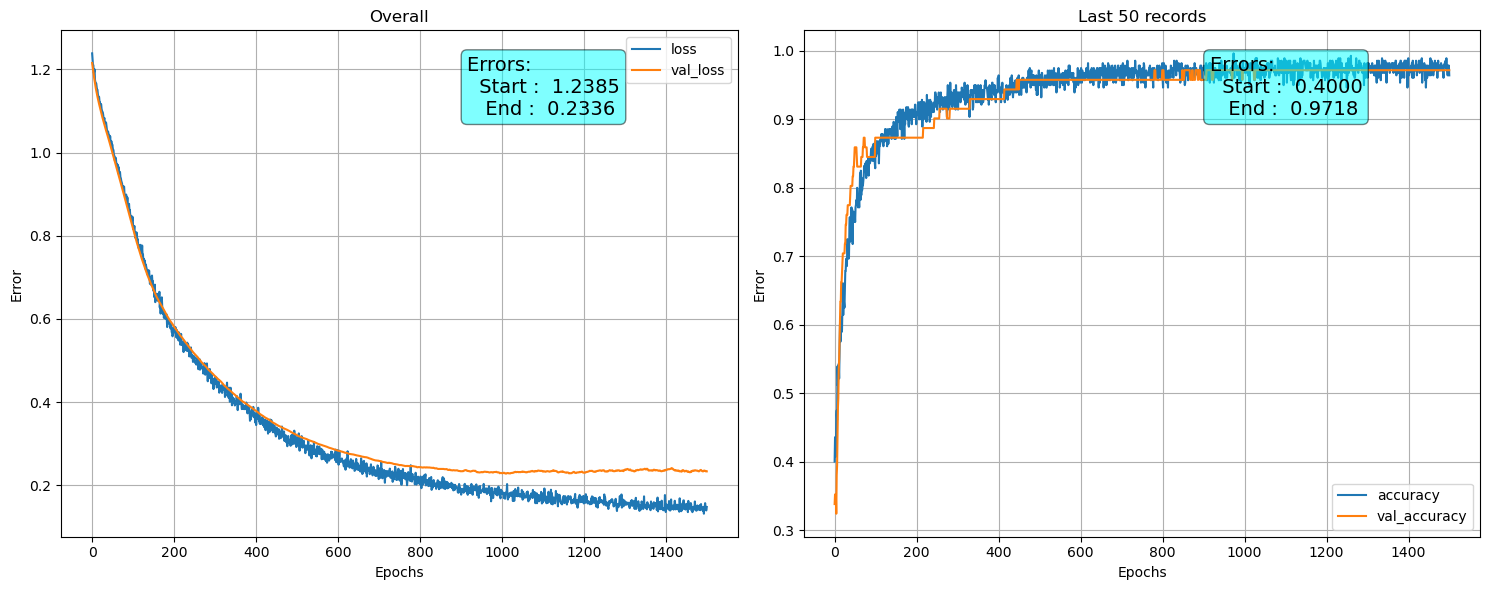

In [19]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))

l_range = 50

ax = axes[0]


ax = axes[0]
y1 = loss_df.columns[0]
y2 = loss_df.columns[2]

loss_df.plot(y = [y1,y2], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0][y1],
                                                                loss_df.iloc[-1][y2]) #text to plot

# properties  matplotlib.patch.Patch
props = dict(boxstyle='round', facecolor='aqua', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Overall')
ax.grid();


y1 = loss_df.columns[1]
y2 = loss_df.columns[3]

ax = axes[1]

loss_df.plot(y = [y1,y2], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0][y1],
                                                                loss_df.iloc[-1][y2]) #text to plot

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Last {} records'.format(l_range))
ax.grid();
plt.tight_layout()

In [20]:
loss_df[loss_df['val_loss'] == (loss_df['val_loss'].min())]

loss  accuracy  val_loss  val_accuracy
1009  0.179458  0.971429   0.22813      0.971831

In [21]:
subDir = 'G01(ionosphere)'
modelDir = 'Model_Saved'

# Checkpoint
checkpointPath = os.path.join(modelDir,subDir) # Path to to sSave the Files
checkpointPath

'Model_Saved/G01(ionosphere)'

In [22]:
model_check_point = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpointPath,
    save_weights_only = True,
    save_best_only = True,
    monitor = 'val_loss',

)

es_check_point = tf.keras.callbacks.EarlyStopping(
monitor='val_loss',
    min_delta=0,
    patience=PATIENCE,
    verbose=1,
    restore_best_weights=True,
    start_from_epoch=0,)

In [23]:
history = model.fit(X_train,y_train,
                    validation_data = [X_test,y_test],
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    verbose = 2,
                    callbacks = [model_check_point,es_check_point]
                   )

Epoch 1/1500
9/9 - 0s - loss: 0.1526 - accuracy: 0.9750 - val_loss: 0.2338 - val_accuracy: 0.9718 - 258ms/epoch - 29ms/step
Epoch 2/1500
9/9 - 0s - loss: 0.1401 - accuracy: 0.9821 - val_loss: 0.2342 - val_accuracy: 0.9718 - 105ms/epoch - 12ms/step
Epoch 3/1500
9/9 - 0s - loss: 0.1333 - accuracy: 0.9857 - val_loss: 0.2348 - val_accuracy: 0.9718 - 119ms/epoch - 13ms/step
Epoch 4/1500
9/9 - 0s - loss: 0.1388 - accuracy: 0.9786 - val_loss: 0.2353 - val_accuracy: 0.9718 - 103ms/epoch - 11ms/step
Epoch 5/1500
9/9 - 0s - loss: 0.1578 - accuracy: 0.9607 - val_loss: 0.2364 - val_accuracy: 0.9718 - 104ms/epoch - 12ms/step
Epoch 6/1500
9/9 - 0s - loss: 0.1390 - accuracy: 0.9786 - val_loss: 0.2371 - val_accuracy: 0.9718 - 101ms/epoch - 11ms/step
Epoch 7/1500
9/9 - 0s - loss: 0.1397 - accuracy: 0.9821 - val_loss: 0.2375 - val_accuracy: 0.9718 - 102ms/epoch - 11ms/step
Epoch 8/1500
9/9 - 0s - loss: 0.1411 - accuracy: 0.9714 - val_loss: 0.2371 - val_accuracy: 0.9718 - 104ms/epoch - 12ms/step
Epoch 9/

Epoch 67/1500
9/9 - 0s - loss: 0.1462 - accuracy: 0.9750 - val_loss: 0.2369 - val_accuracy: 0.9718 - 98ms/epoch - 11ms/step
Epoch 68/1500
9/9 - 0s - loss: 0.1577 - accuracy: 0.9571 - val_loss: 0.2366 - val_accuracy: 0.9718 - 100ms/epoch - 11ms/step
Epoch 69/1500
9/9 - 0s - loss: 0.1440 - accuracy: 0.9714 - val_loss: 0.2363 - val_accuracy: 0.9718 - 106ms/epoch - 12ms/step
Epoch 70/1500
9/9 - 0s - loss: 0.1323 - accuracy: 0.9750 - val_loss: 0.2366 - val_accuracy: 0.9718 - 105ms/epoch - 12ms/step
Epoch 71/1500
9/9 - 0s - loss: 0.1244 - accuracy: 0.9929 - val_loss: 0.2368 - val_accuracy: 0.9718 - 103ms/epoch - 11ms/step
Epoch 72/1500
9/9 - 0s - loss: 0.1403 - accuracy: 0.9786 - val_loss: 0.2373 - val_accuracy: 0.9718 - 98ms/epoch - 11ms/step
Epoch 73/1500
9/9 - 0s - loss: 0.1536 - accuracy: 0.9500 - val_loss: 0.2371 - val_accuracy: 0.9718 - 99ms/epoch - 11ms/step
Epoch 74/1500
9/9 - 0s - loss: 0.1397 - accuracy: 0.9714 - val_loss: 0.2359 - val_accuracy: 0.9718 - 103ms/epoch - 11ms/step
Epo

Epoch 133/1500
9/9 - 0s - loss: 0.1418 - accuracy: 0.9750 - val_loss: 0.2382 - val_accuracy: 0.9718 - 105ms/epoch - 12ms/step
Epoch 134/1500
9/9 - 0s - loss: 0.1359 - accuracy: 0.9714 - val_loss: 0.2371 - val_accuracy: 0.9718 - 102ms/epoch - 11ms/step
Epoch 135/1500
9/9 - 0s - loss: 0.1396 - accuracy: 0.9786 - val_loss: 0.2368 - val_accuracy: 0.9718 - 98ms/epoch - 11ms/step
Epoch 136/1500
9/9 - 0s - loss: 0.1318 - accuracy: 0.9821 - val_loss: 0.2374 - val_accuracy: 0.9718 - 104ms/epoch - 12ms/step
Epoch 137/1500
9/9 - 0s - loss: 0.1462 - accuracy: 0.9643 - val_loss: 0.2375 - val_accuracy: 0.9718 - 98ms/epoch - 11ms/step
Epoch 138/1500
9/9 - 0s - loss: 0.1480 - accuracy: 0.9679 - val_loss: 0.2367 - val_accuracy: 0.9718 - 98ms/epoch - 11ms/step
Epoch 139/1500
9/9 - 0s - loss: 0.1310 - accuracy: 0.9857 - val_loss: 0.2367 - val_accuracy: 0.9718 - 103ms/epoch - 11ms/step
Epoch 140/1500
9/9 - 0s - loss: 0.1302 - accuracy: 0.9786 - val_loss: 0.2363 - val_accuracy: 0.9718 - 103ms/epoch - 11ms/

In [24]:
#whole model

In [25]:
subDir = 'G01(ionosphere)'
modelDir = 'Model_Saved'

savePath = os.path.join(modelDir,subDir,'whole_model')
tf.keras.models.save_model(model,savePath)

INFO:tensorflow:Assets written to: Model_Saved/G01(ionosphere)/whole_model/assets


INFO:tensorflow:Assets written to: Model_Saved/G01(ionosphere)/whole_model/assets


In [26]:
# Load Model

In [27]:
model = tf.keras.models.load_model(savePath)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 23)                782       
                                                                 
 dropout (Dropout)           (None, 23)                0         
                                                                 
 dense_1 (Dense)             (None, 13)                312       
                                                                 
 dropout_1 (Dropout)         (None, 13)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 42        
                                                                 
 dropout_2 (Dropout)         (None, 3)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 8

In [28]:
model.load_weights(checkpointPath)

In [29]:
model.compile(optimizer = 'adam',loss = ce_loss,metrics = ['accuracy'])
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.2323 - accuracy: 0.9718


[0.2323482632637024, 0.9718309640884399]